# description

**purpose**: execute control of agent to find best model

**current capability**
- none

**desired capability**
- create agent that will get rewards based on desired output defined in data-model space

**nomenclature**
- data-model space: 
    - data: sets chosen to look at to generate predictions, the output is a data set and its feature engineering
    - model: all models applicable to problem at hand, the output is the model and its paramers

# setup

In [2]:
import pandas as pd
import autosklearn.classification
import sklearn.model_selection
import sklearn.datasets
import sklearn.metrics

# execution

In [3]:
X, y = sklearn.datasets.load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = \
    sklearn.model_selection.train_test_split(X, y, random_state=1)
automl = autosklearn.classification.AutoSklearnClassifier()
automl.fit(X_train, y_train)
y_hat = automl.predict(X_test)
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_hat))
# runs in 1 hour 

Accuracy score 0.9911111111111112


<AxesSubplot:xlabel='Timestamp'>

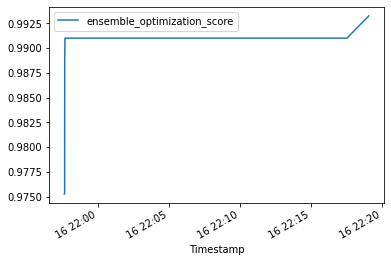

In [19]:
automl.performance_over_time_.plot(x = 'Timestamp', y = 'ensemble_optimization_score')

In [13]:
automl.leaderboard()

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
95,1,0.02,libsvm_svc,0.008989,1.000073
139,2,0.02,libsvm_svc,0.008989,29.041441
133,3,0.02,libsvm_svc,0.008989,28.514001
131,4,0.02,libsvm_svc,0.008989,1.951547
103,5,0.02,libsvm_svc,0.008989,1.772655
99,6,0.02,libsvm_svc,0.008989,2.048052
149,7,0.02,libsvm_svc,0.008989,1.104653
91,8,0.02,libsvm_svc,0.008989,29.471755
158,9,0.04,libsvm_svc,0.008989,1.827307


In [14]:
automl.show_models()

{73: {'model_id': 73,
  'rank': 1,
  'cost': 0.008988764044943864,
  'ensemble_weight': 0.02,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f616381fc40>,
  'balancing': Balancing(random_state=1, strategy='weighting'),
  'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice at 0x7f61636b9df0>,
  'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice at 0x7f61636b9c10>,
  'sklearn_classifier': SVC(C=8105.14774347337, cache_size=1937.265625, class_weight='balanced',
      coef0=-0.7239587404590612, degree=5, gamma=7.8031149750085245,
      kernel='poly', max_iter=-1.0, random_state=1, tol=0.0033326967013445987)},
 91: {'model_id': 91,
  'rank': 2,
  'cost': 0.008988764044943864,
  'ensemble_weight': 0.02,
  'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice at 0x7f61636c35b0>,
  'balancing': Balancing(random_state

In [12]:
automl.get_models_with_weights()

[(0.26,
  SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'qda', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'no_preprocessing', 'classifier:qda:reg_param': 0.14164230078359996, 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'no_coalescense', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize'},
  dataset_properties={
    'task': 2,
    'sparse': False,
    'multilabel': False,
    'multiclass': True,
    'target_type': 'classification',
    'signed': False})),
 (0.14,
  SimpleClassificationPipeline({'balancing:strategy': 'weighting', 'classifier:__choice__': 'qda', 'data_preprocessor:__choice__': 'feature_type', 'feature_preproces